单元格 1：路径修复 (Path Fix)

In [1]:
import sys
import os

# --- 1. 🧭 自动检测项目根目录 ---
# 我们的 notebook 位于 EDA/notebooks 目录下，返回上一级到 EDA 目录
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
print(f"📁 当前 CWD（工作目录）是: {os.getcwd()}")
print(f"📦 自动检测到项目根目录是: {project_root}")

# --- 2. 🧩 将项目根目录加入 sys.path（防止 import 报错）---
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"✅ 已将项目根目录添加到 sys.path: {project_root}")
else:
    print(f"ℹ️ 项目根目录已在 sys.path 中: {project_root}")

# --- 3. 🔍 检查 'eda' 文件夹是否存在，并加入 sys.path ---
eda_path = os.path.join(project_root, 'eda')
if os.path.isdir(eda_path):
    print(f"✅ 找到了 'eda' 文件夹: {eda_path}")
    if eda_path not in sys.path:
        sys.path.insert(0, eda_path)
        print(f"✅ 已将 'eda' 文件夹加入 sys.path: {eda_path}")
    else:
        print(f"ℹ️ 'eda' 文件夹已在 sys.path 中。")
else:
    print(f"❌ 严重错误: 在项目根目录下未找到 'eda' 文件夹: {eda_path}")
    print("👉 请检查 EDA 目录结构是否正确。")

# --- 4. 🧪 最终确认 ---
print("\n🧾 sys.path 前三项预览:")
for p in sys.path[:3]:
    print("  -", p)


📁 当前 CWD（工作目录）是: c:\Users\ALIENWARE\Desktop\COMP396\COMP396-Group-Project\notebooks
📦 自动检测到项目根目录是: c:\Users\ALIENWARE\Desktop\COMP396\COMP396-Group-Project
✅ 已将项目根目录添加到 sys.path: c:\Users\ALIENWARE\Desktop\COMP396\COMP396-Group-Project
✅ 找到了 'eda' 文件夹: c:\Users\ALIENWARE\Desktop\COMP396\COMP396-Group-Project\eda
✅ 已将 'eda' 文件夹加入 sys.path: c:\Users\ALIENWARE\Desktop\COMP396\COMP396-Group-Project\eda

🧾 sys.path 前三项预览:
  - c:\Users\ALIENWARE\Desktop\COMP396\COMP396-Group-Project\eda
  - c:\Users\ALIENWARE\Desktop\COMP396\COMP396-Group-Project
  - d:\Anacoda\envs\comp396\python311.zip


单元格 2：“最小修复” (Import Test)

In [2]:
# 单元格 2 (修改)：导入所有军火库

# 1. 标准库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import mplfinance as mpf
warnings.filterwarnings('ignore')
print("--- 1. 标准库导入成功 ---")

# 2. 导入我们自己的“eda”包 (这就是“包的厉害”)
try:
    # 导入数据加载器
    from eda import data_loader
    
    # 导入所有绘图模块
    from eda.plotting import plot_acf_charts
    from eda.plotting import plot_candlestick
    from eda.plotting import plot_correlation_heatmap
    from eda.plotting import plot_garch_analysis
    from eda.plotting import plot_hurst_analysis
    from eda.plotting import plot_quantile_analysis
    from eda.plotting import plot_return_histograms
    from eda.plotting import plot_rsi_analysis
    from eda.plotting import plot_seasonality_analysis
    from eda.plotting import plot_volatility
    from eda.plotting import plot_volume_analysis
    
    print("--- 2. 成功导入 'eda' 包 (所有工具) ---")
    print("\n🎉 军火库已装填! 准备开始分析。")
    
except ImportError as e:
    print(f"❌ 导入失败: {e}")
    print("请确认单元格 1 的路径修复已正确执行。")

--- 1. 标准库导入成功 ---
--- 2. 成功导入 'eda' 包 (所有工具) ---

🎉 军火库已装填! 准备开始分析。


单元格 3 (新增)：加载数据
(注意：我们调用 data_loader，而不是粘贴代码)

In [3]:
# 单元格 3 (新增)：加载数据

print("--- 3. 正在加载和准备数据... ---")

# 路径是 'notebooks/' 的上一级 ('..')，然后再进入 'DATA/PART1/'
DATA_PATH = "../DATA/PART1/" 

# 【这就是回报!】
# 我们调用 'eda.data_loader.py' 文件中的函数
try:
    # 【【请用您真正的函数名替换 'load_and_merge_data'!!】】
    merged_prices = data_loader.load_and_merge_data(DATA_PATH)
    
    # 【【请用您真正的函数名替换 'calculate_log_returns'!!】】
    log_returns = data_loader.calculate_log_returns(merged_prices) 

    if not merged_prices.empty:
        print(f"✅ 数据加载完毕, {len(merged_prices.columns)} 个资产。")
        display(log_returns.head())
    else:
        print("❌ 错误: 最终的 'merged_prices' 为空，请检查数据。")
        
except AttributeError as e:
    print(f"❌ 数据加载失败: {e}")
    print("错误很可能是：您在 'eda/data_loader.py' 中的函数名不正确。")
    print("请打开该 .py 文件，找到正确的函数名并替换它。")
except Exception as e:
    print(f"❌ 数据加载失败: {e} (请检查 DATA_PATH)")

--- 3. 正在加载和准备数据... ---
✅ 数据加载完毕, 10 个资产。


,01,02,03,04,05,06,07,08,09,10
Date,,,,,,,,,,
2069-12-09,0.001989,-0.074108,-0.000412,0.018868,-0.001039,0.025859,0.003381,0.000975,0.002817,0.021764
2069-12-10,0.006339,-0.010309,0.000000,-0.016151,0.000346,0.000000,-0.000628,-0.004233,-0.000703,-0.010279
2069-12-11,0.000000,0.000000,0.000274,-0.017796,-0.002080,-0.007707,-0.002674,0.003258,-0.004231,-0.009287
2069-12-12,-0.005942,0.002218,-0.000961,0.026353,0.002657,0.009625,0.002517,-0.001302,-0.006736,0.001645
2069-12-13,-0.002387,0.002950,0.003428,-0.015364,-0.006714,-0.004416,-0.000314,-0.000326,-0.003565,0.004919


单元格 4 (最终版)：🚀 “军火库”单资产分析 🚀

✅ 先决条件检查通过。

--- 🚀 正在为资产: 【01】 执行“军火库”全部分析 ---
✅ OHLCV 数据包已加载。

--- [1/7] 分析: Hurst 指数 (趋势性) ---
  Calculating Rolling Hurst for 01 (window=252)...


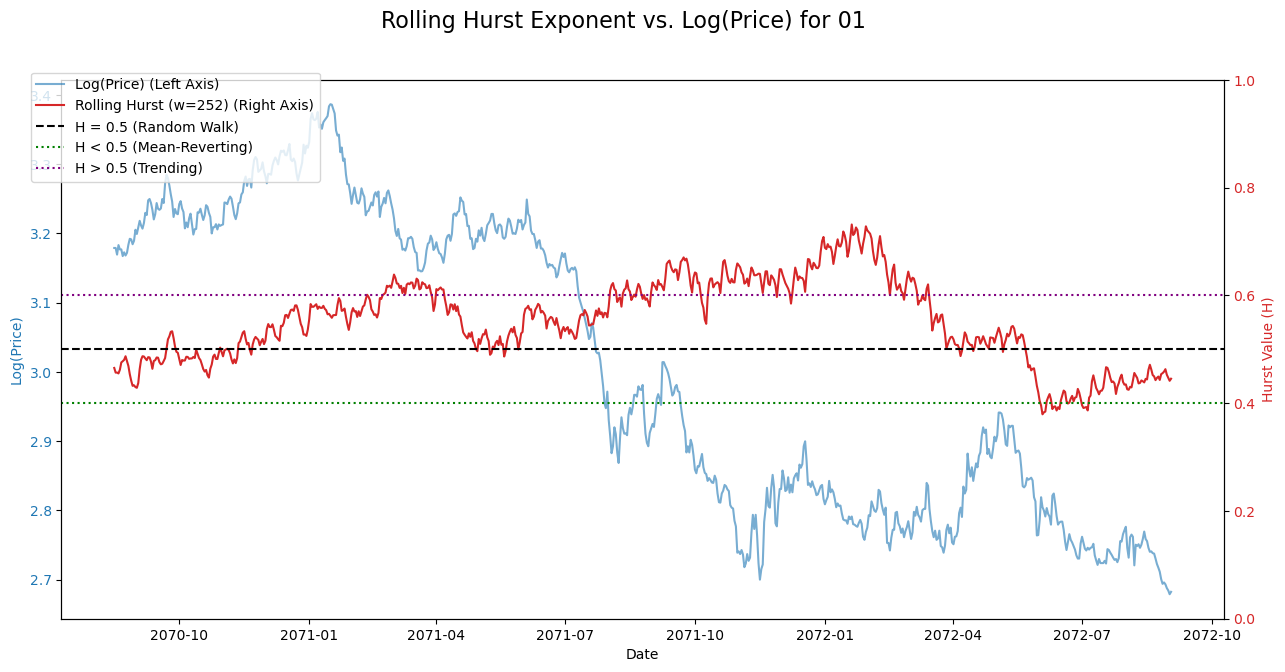


--- [2/7] 分析: ACF/PACF (自相关性) ---


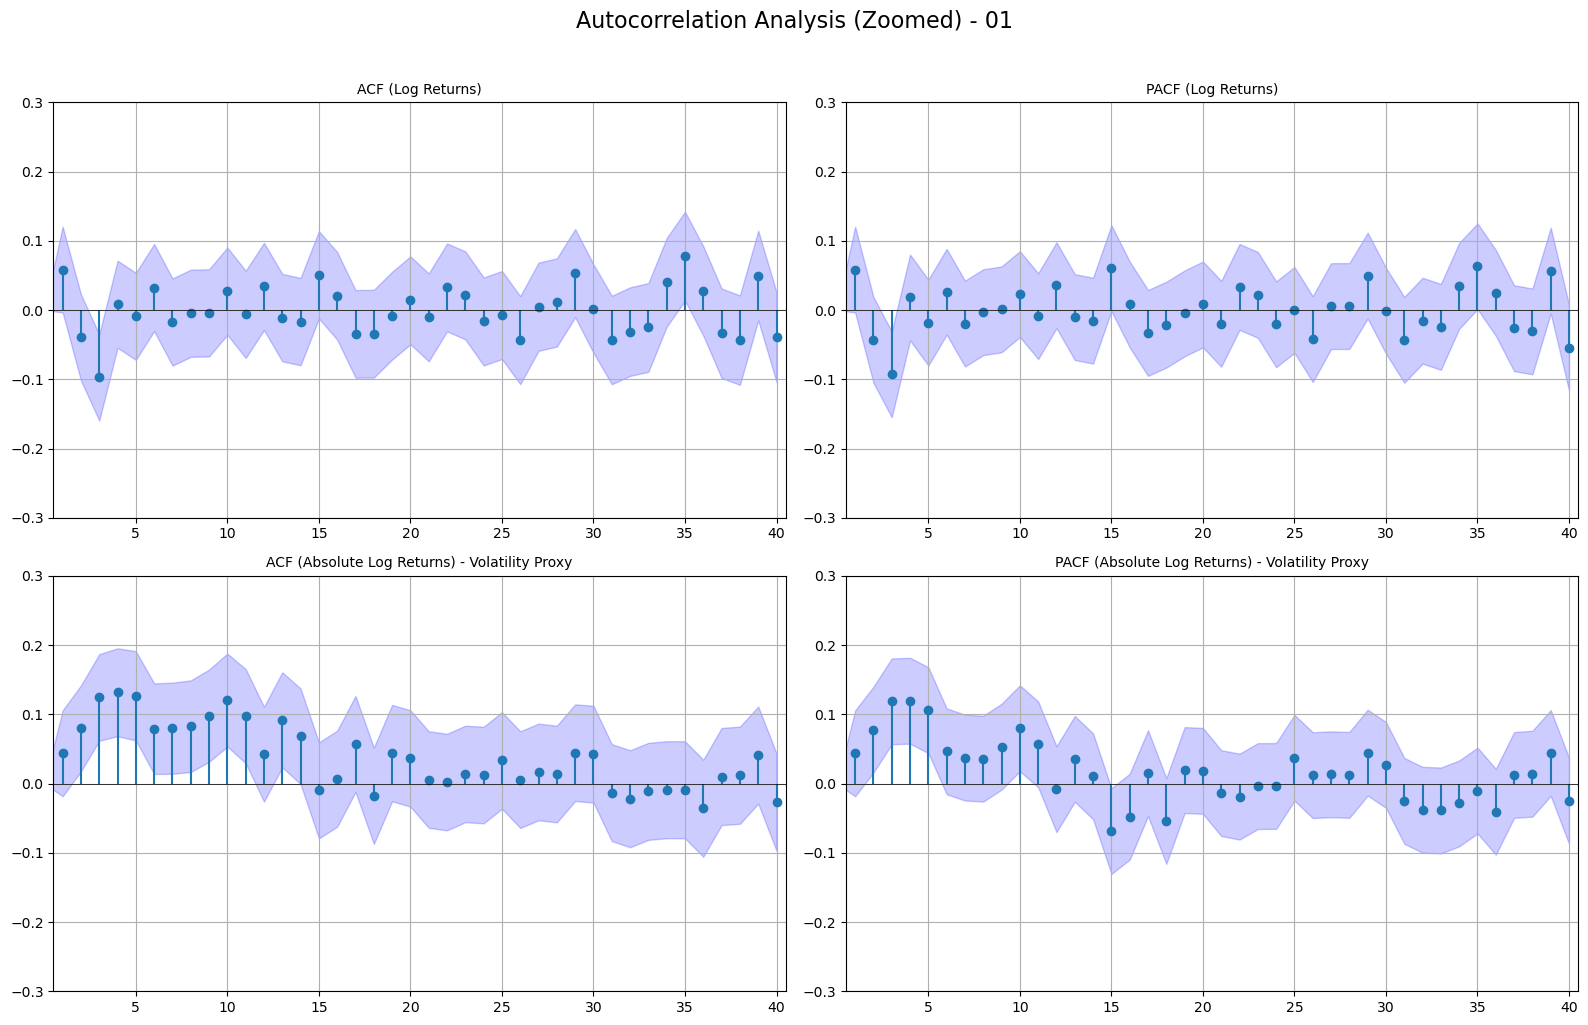


--- [3/7] 分析: GARCH (波动率集群) ---
  Analyzing GARCH for 01...

--- GARCH(1,1) Summary for 01 ---
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                           01   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1647.88
Distribution:      Standardized Student's t   AIC:                           3305.76
Method:                  Maximum Likelihood   BIC:                           3330.29
                                              No. Observations:                  999
Date:                      Tue, Nov 04 2025   Df Residuals:                      998
Time:                              00:49:57   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0

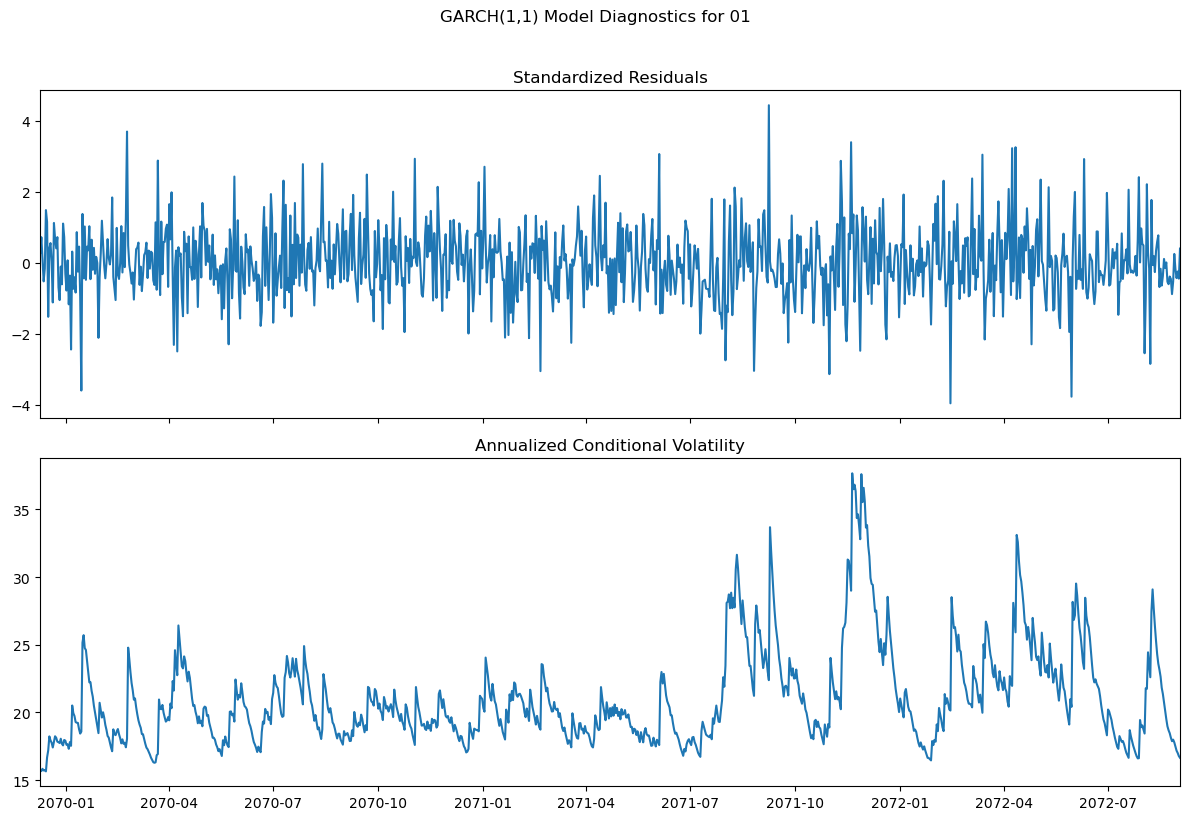


--- [4/7] 分析: RSI 信号 (均值回归) ---
  Analyzing RSI(14) < 30 signal for 01...

--- RSI Signal Analysis for 01 (N=5 Days) ---
Total days analyzed: 982
Days with RSI < 30 signal: 75
  Avg. Forward Return (All Days): -0.0024
  Avg. Forward Return (Signal Days): -0.0052
  T-statistic (Signal vs Non-Signal): -0.726
  P-value (Signal > Non-Signal):  0.76518
  ❌ 结论: 信号未表现出统计显著性。
--------------------------------------------------


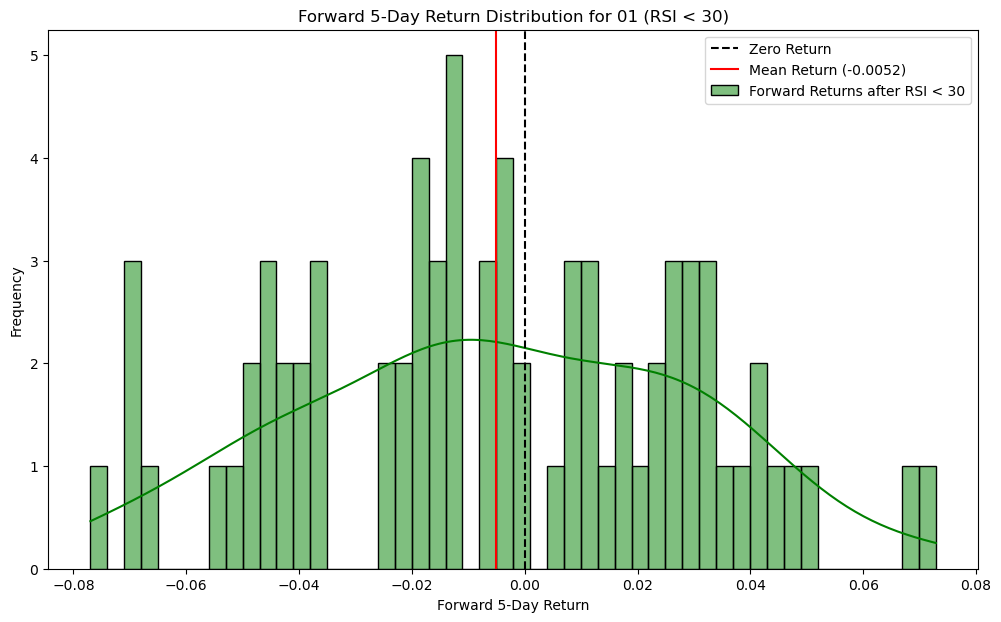


--- [5/7] 分析: 季节性 (日/月效应) ---
  Analyzing Seasonality for 01...


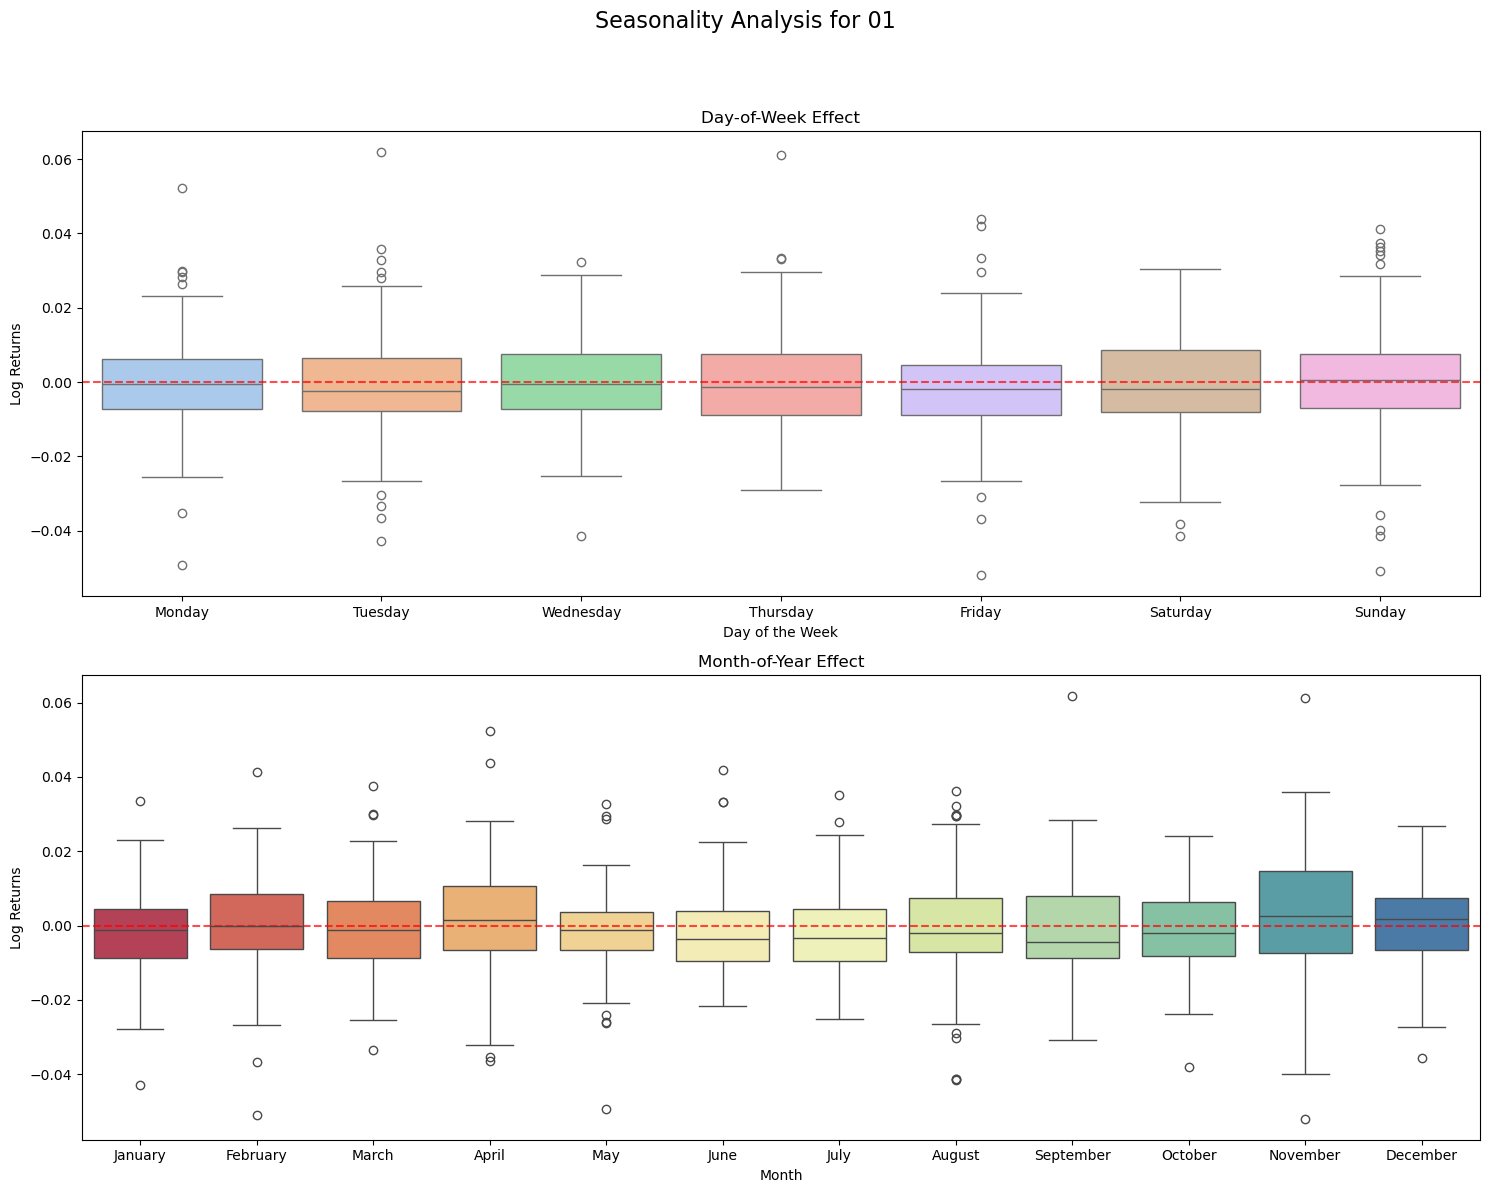


--- [6/7] 分析: 滚动波动率 (ATR vs StDev) ---


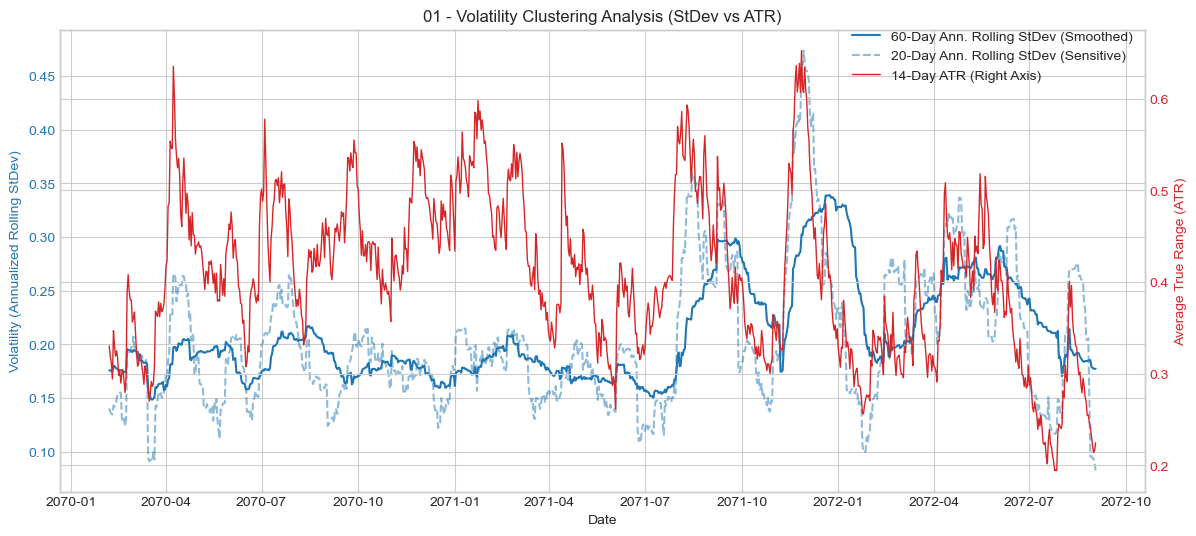


--- [7/7] 分析: 成交量信号 (RSI vs MFI) ---
  Analyzing Volume-Filtered Signals for 01...

--- Volume Filter Analysis for 01 (N=5 Days) ---
  Signal (RSI < 30):
    Signal Count: 75
    Avg. Fwd Return: -0.0052

  Signal (RSI < 30 AND MFI < 30):
    Signal Count: 61 (Filtered out 14 signals)
    Avg. Fwd Return: -0.0086

  T-test (Filtered > RSI-Only): T-stat=-0.578, P-value=0.71795
  ❌ 结论: MFI 过滤器未显示统计上显著的提升。
--------------------------------------------------


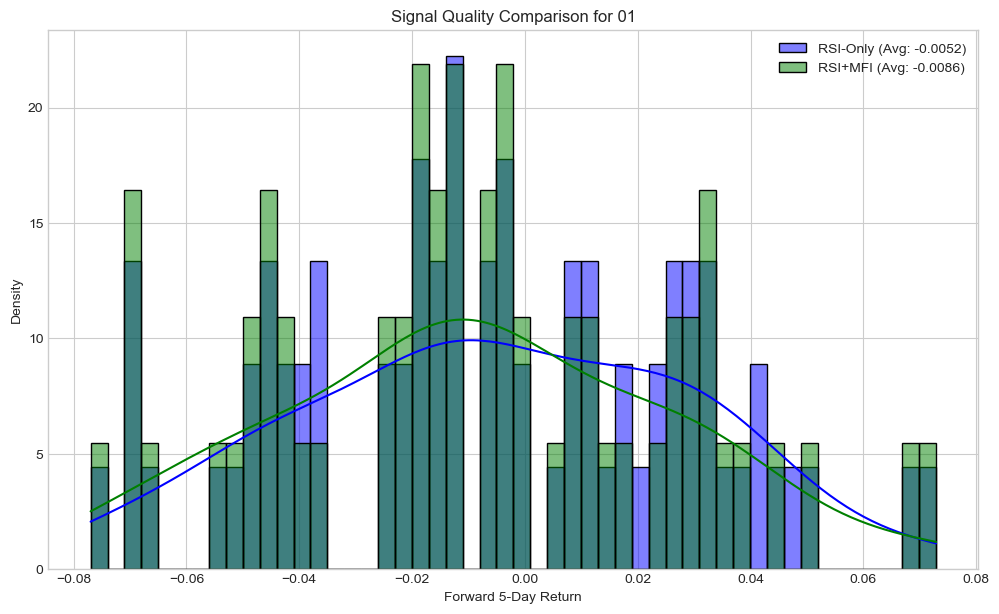


--- ✅ “军火库”已为【01】执行完毕 ---


In [4]:
# 单元格 4 (最终版)：🚀 “军火库”单资产分析 🚀

# --- 1. 检查先决条件 (确保 C1-C3 已运行) ---
if 'merged_prices' not in locals() or 'log_returns' not in locals():
    print("❌ 错误: 'merged_prices' 或 'log_returns' 未定义。")
    print(">> 请从头开始运行 单元格 1, 2, 和 3。")
else:
    print("✅ 先决条件检查通过。")

    # --- 2. 资产选择 ---
    # (未来您可以改成 for 循环，但现在我们只分析第一个资产)
    asset_name = merged_prices.columns[0] 
    print(f"\n{'='*50}")
    print(f"--- 🚀 正在为资产: 【{asset_name}】 执行“军火库”全部分析 ---")
    print(f"{'='*50}")

    # --- 3. 准备数据包 (Data Bundles) ---
    
    # 数据包 1: Close-Only (用于 Hurst, ACF, GARCH, RSI, Seasonality)
    asset_prices = merged_prices[asset_name].dropna()
    asset_log_returns = log_returns[asset_name].dropna()
    asset_abs_log_returns = asset_log_returns.abs() # (ACF V3 需要这个)

    # 数据包 2: OHLCV (用于 Volatility, Volume)
    # (我们只加载一次，然后传递给两个函数)
    ohlcv_df = None
    try:
        csv_file_path = f"../DATA/PART1/{asset_name}.csv"
        # 我们使用 Volatility 的加载器，因为它很健壮
        ohlcv_df = plot_volatility.load_single_asset_ohlcv(csv_file_path) #
        if ohlcv_df is None:
            print(f"⚠️ 警告: 无法为 {asset_name} 加载 OHLCV 数据。将跳过 Volatility 和 Volume 分析。")
        else:
            print("✅ OHLCV 数据包已加载。")
    except Exception as e:
        print(f"❌ 加载 OHLCV 数据时出错: {e}")

    # --- 4. 🚀 开始执行分析 (按顺序) 🚀 ---

    # [1/7] Hurst 指数 (趋势性)
    print("\n--- [1/7] 分析: Hurst 指数 (趋势性) ---")
    try:
        window = 252 # (来自 .py 文件的默认值)
        plot_hurst_analysis.plot_rolling_hurst_v2(
            price_series=asset_prices, 
            asset_name=asset_name,
            window_size=window
        )
    except Exception as e:
        print(f"❌ Hurst 分析失败: {e}")

    # [2/7] ACF/PACF (自相关性)
    print("\n--- [2/7] 分析: ACF/PACF (自相关性) ---")
    try:
        plot_acf_charts.plot_acf_pacf_plot_v3(
            log_returns_series=asset_log_returns,
            absolute_log_returns_series=asset_abs_log_returns,
            asset_name=asset_name,
            lags=40, ylim=(-0.3, 0.3) # (来自 .py 文件的默认值)
        )
    except Exception as e:
        print(f"❌ ACF 分析失败: {e}")

    # [3/7] GARCH (波动率集群)
    print("\n--- [3/7] 分析: GARCH (波动率集群) ---")
    try:
        plot_garch_analysis.plot_garch_analysis(
            price_series=asset_prices, 
            asset_name=asset_name
        )
    except Exception as e:
        print(f"❌ GARCH 分析失败: {e}")

    # [4/7] RSI 信号 (均值回归)
    print("\n--- [4/7] 分析: RSI 信号 (均值回归) ---")
    try:
        plot_rsi_analysis.plot_rsi_signal_analysis(
            price_series=asset_prices, 
            asset_name=asset_name
        )
    except Exception as e:
        print(f"❌ RSI 分析失败: {e}")

    # [5/7] 季节性 (日/月效应)
    print("\n--- [5/7] 分析: 季节性 (日/月效应) ---")
    try:
        plot_seasonality_analysis.plot_seasonality_show(
            price_series=asset_prices, 
            asset_name=asset_name
        )
    except Exception as e:
        print(f"❌ 季节性 分析失败: {e}")

    # [6/7] 滚动波动率 (ATR vs StDev)
    print("\n--- [6/7] 分析: 滚动波动率 (ATR vs StDev) ---")
    try:
        if ohlcv_df is None:
            print(f"⚠️ 跳过: 缺少 OHLCV 数据。")
        else:
            # (这是“好”API 之一，我们调用它)
            plot_volatility.plot_volatility_analysis_v2(
                ohlcv_df=ohlcv_df, 
                asset_name=asset_name
            ) #
    except Exception as e:
        print(f"❌ 波动率 分析失败: {e}")

    # [7/7] 成交量信号 (RSI vs MFI)
    print("\n--- [7/7] 分析: 成交量信号 (RSI vs MFI) ---")
    try:
        if ohlcv_df is None:
            print(f"⚠️ 跳过: 缺少 OHLCV 数据。")
        else:
            # (我们调用修复后的 API)
            plot_volume_analysis.plot_volume_signal_analysis(
                df=ohlcv_df.copy(), # 传入副本以防函数修改
                asset_name=asset_name
            )
    except Exception as e:
        print(f"❌ 成交量 分析失败: {e}")

    print(f"\n{'='*50}")
    print(f"--- ✅ “军火库”已为【{asset_name}】执行完毕 ---")
    print(f"{'='*50}")

单元格 5 (最终版)：🚀 “军火库”横截面分析 🚀

✅ 先决条件检查通过。

--- [1/3] 分析: 横截面相关性 (Heatmap) ---


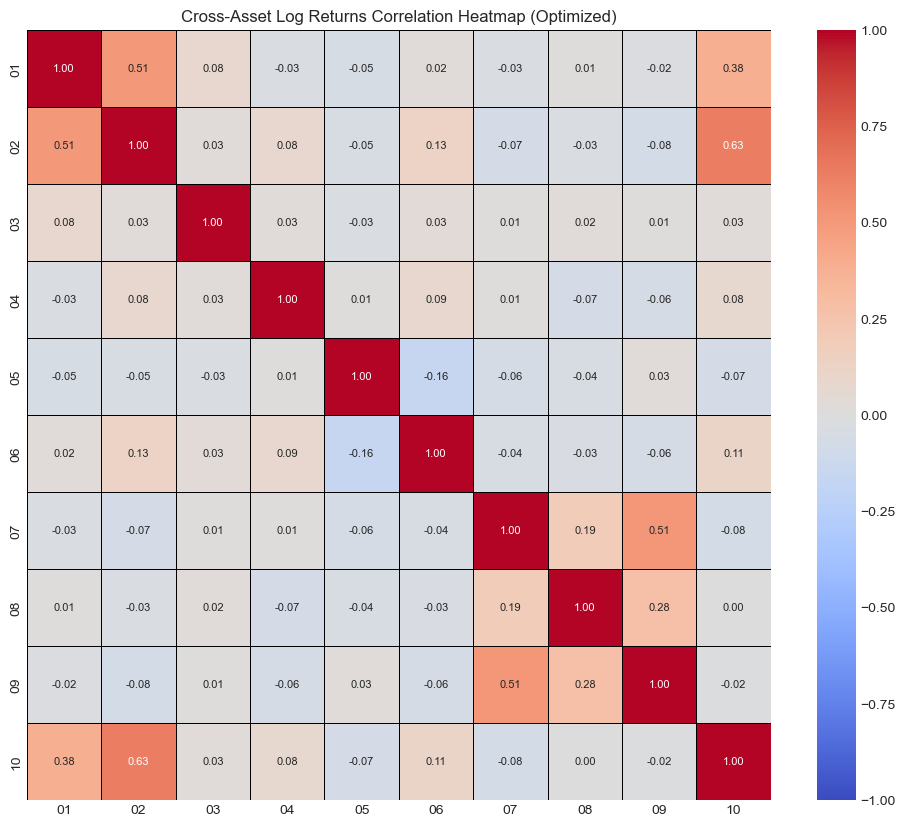


--- [2/3] 分析: 收益率分布 (Histograms) ---
(注意: 这将为 *每个* 资产生成一个图表)
  ... 正在绘制 01 的直方图


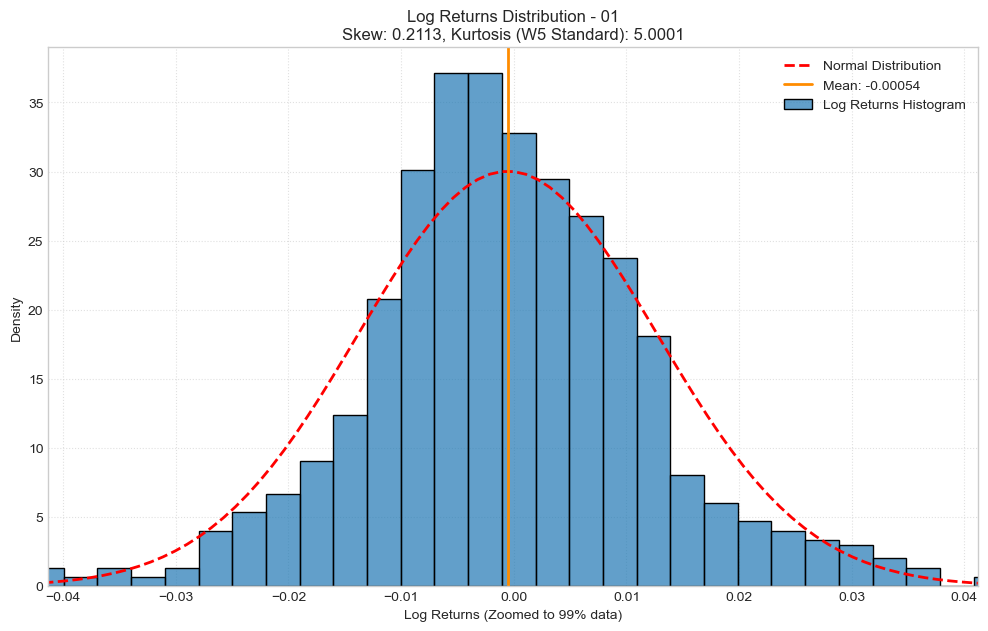

  ... 正在绘制 02 的直方图


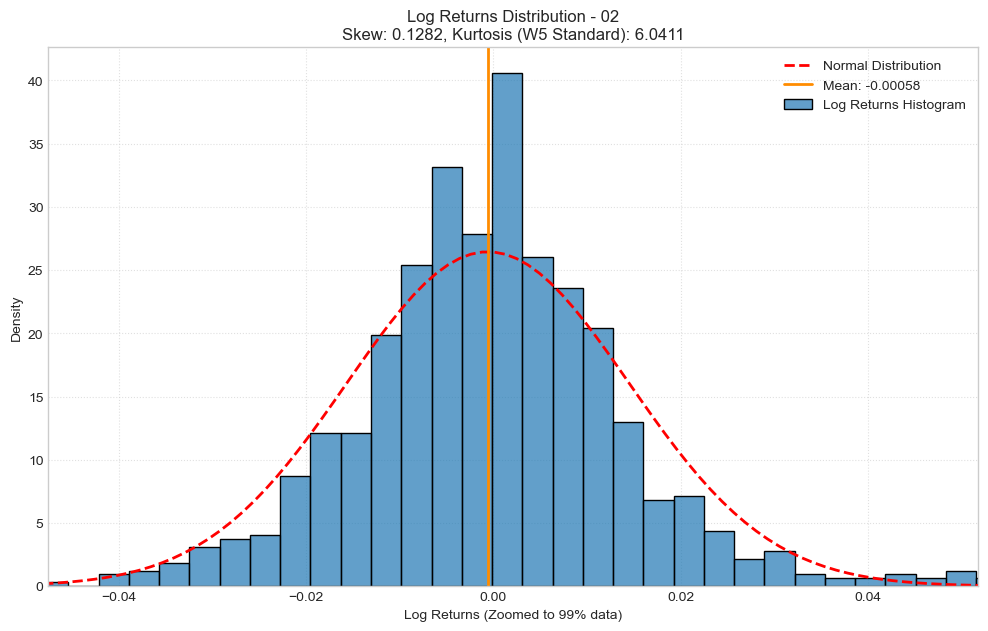

  ... 正在绘制 03 的直方图


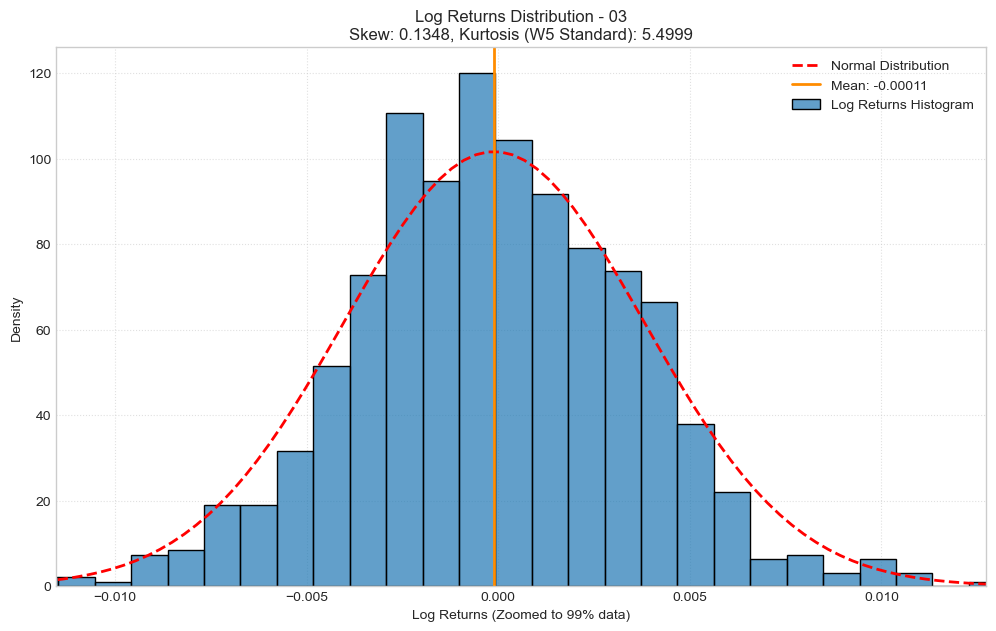

  ... 正在绘制 04 的直方图


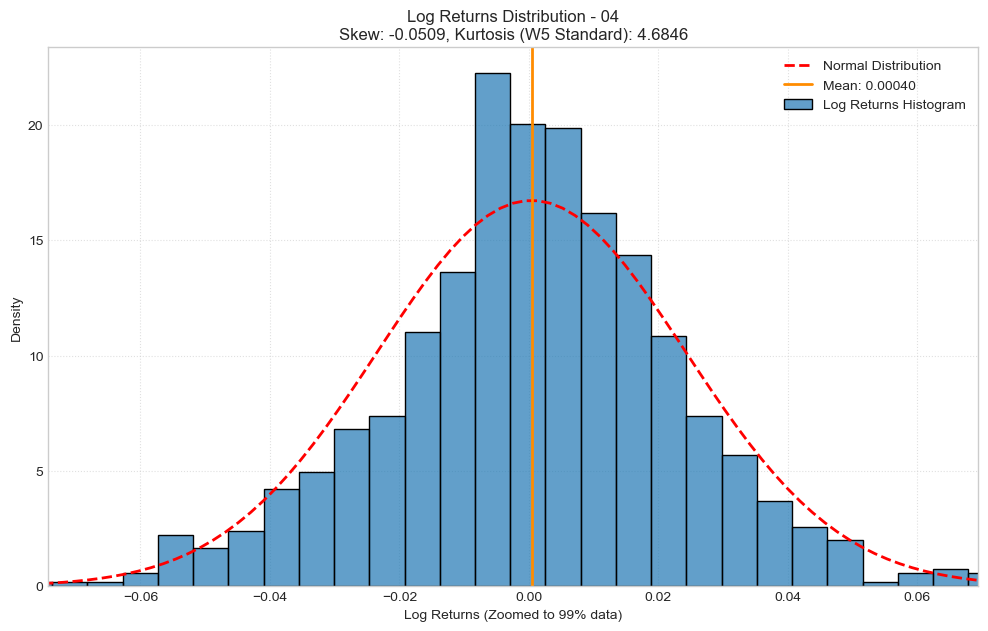

  ... 正在绘制 05 的直方图


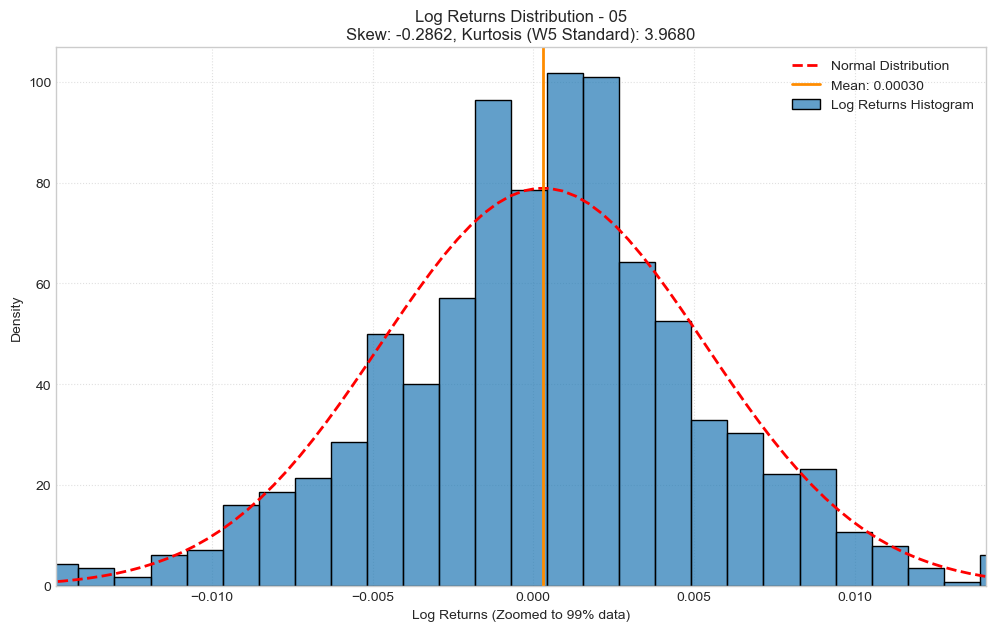

  ... 正在绘制 06 的直方图


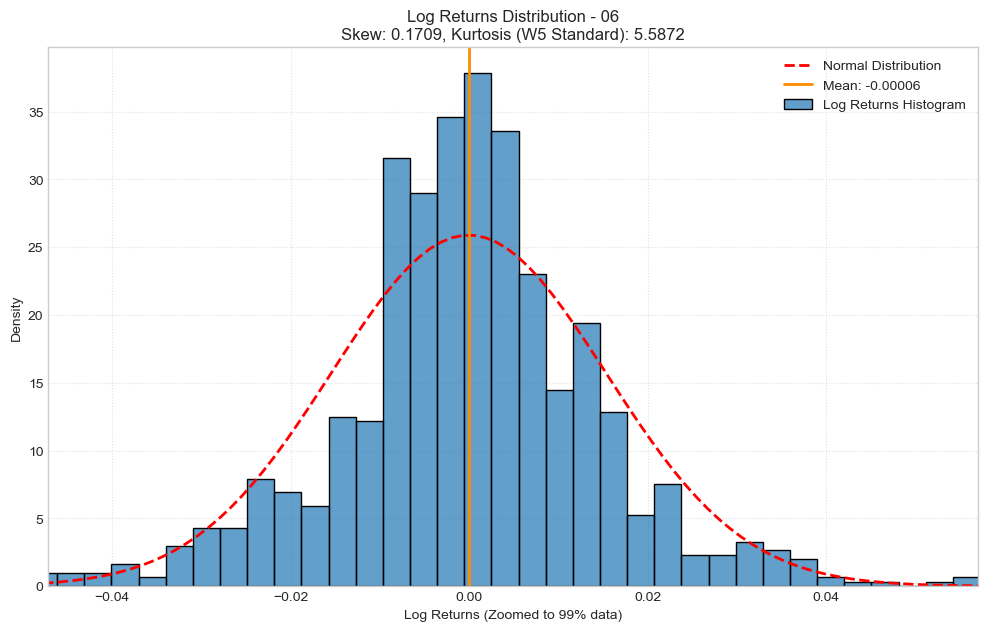

  ... 正在绘制 07 的直方图


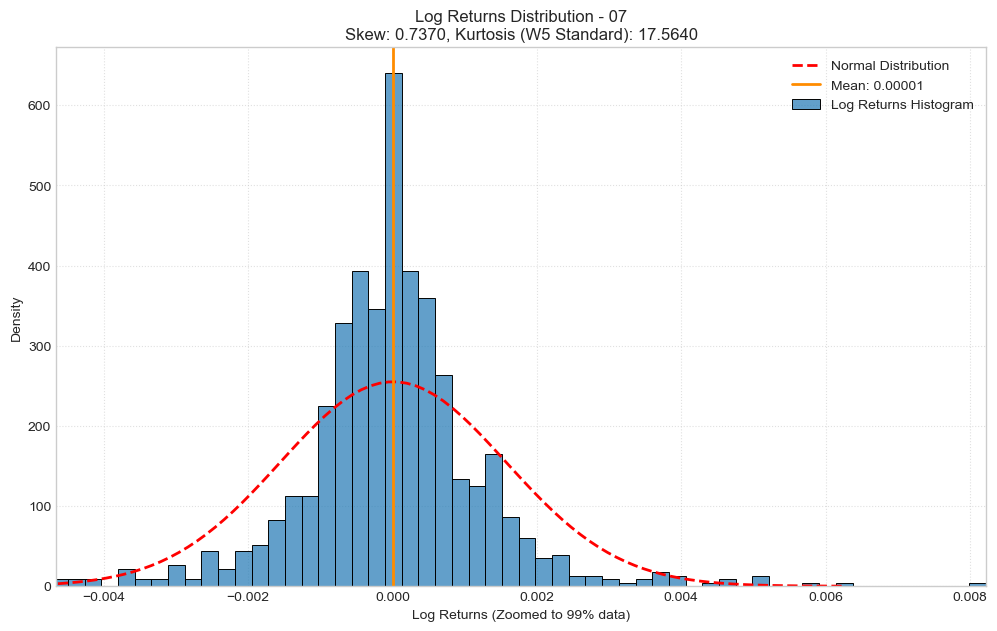

  ... 正在绘制 08 的直方图


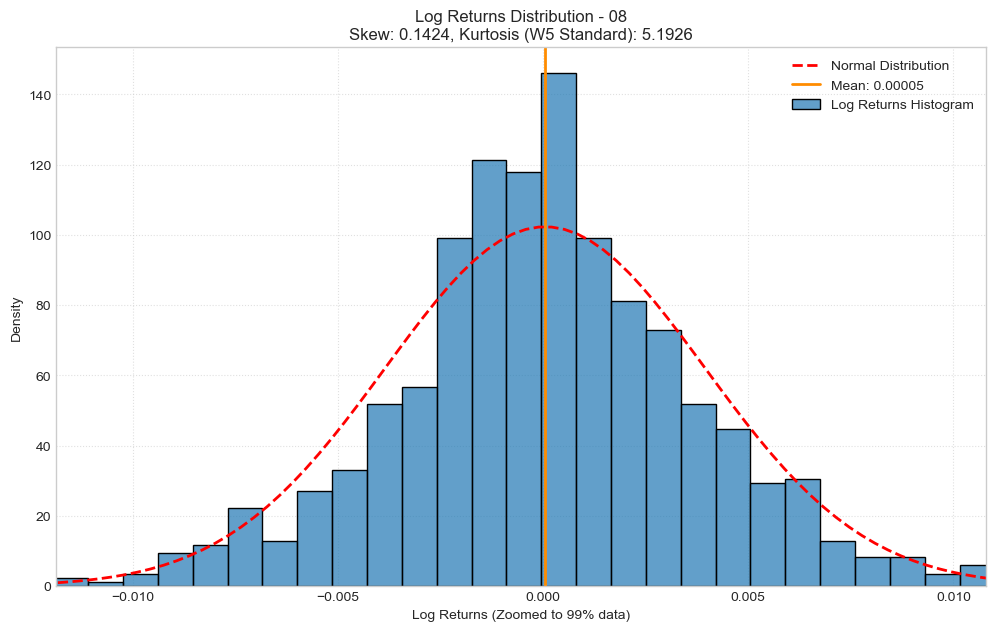

  ... 正在绘制 09 的直方图


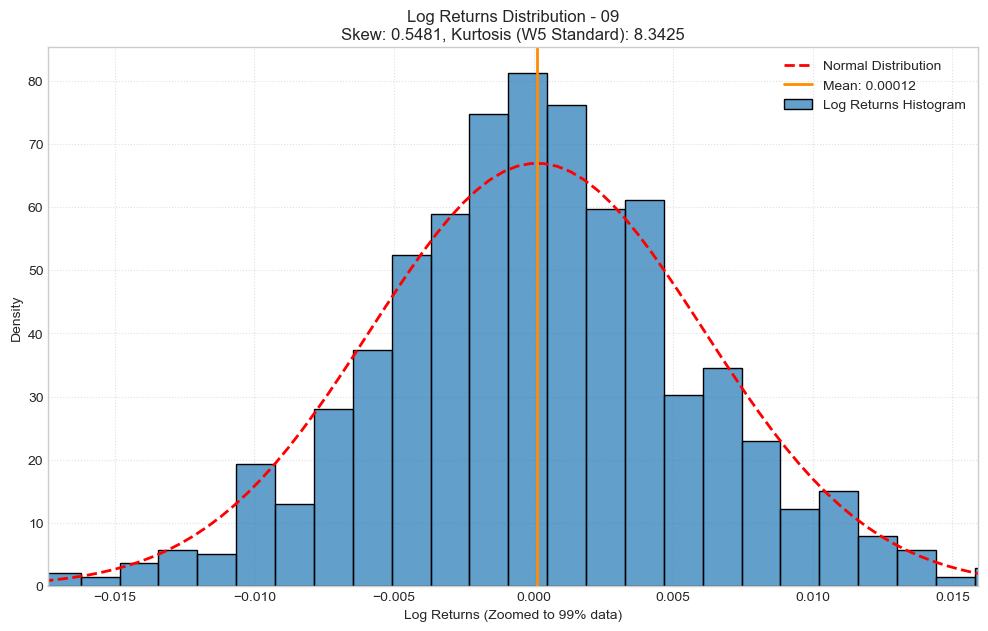

  ... 正在绘制 10 的直方图


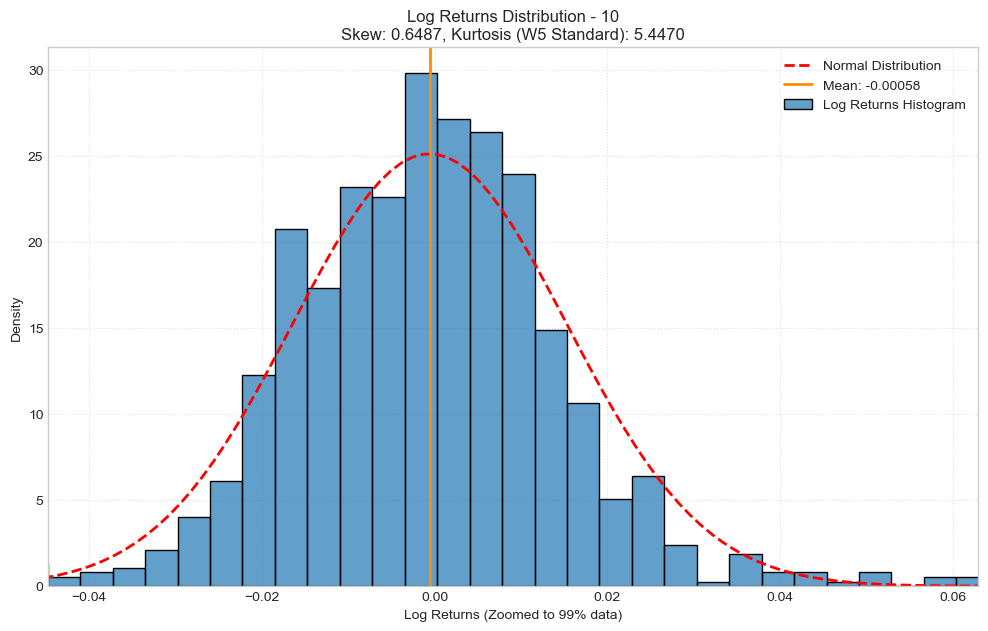


--- [3/3] 分析: 横截面分位数 (Quantile) ---

--- 正在运行分位数分析: STR_21D ---

STR_21D - 每个分位数的平均 21日 收益:
Quantile
1    0.00216
2    0.00138
3    0.00157
4    0.00041
5   -0.00590

--- 核心论据 (统计显著性) ---
T-检验 (Q5 vs Q1): T-stat=-3.682, P-value=0.00023
多空组合 (Momentum, Q5-Q1) 年化夏普比率: -0.4117
多空组合 (Reversal, Q1-Q5) 年化夏普比率: 0.4117


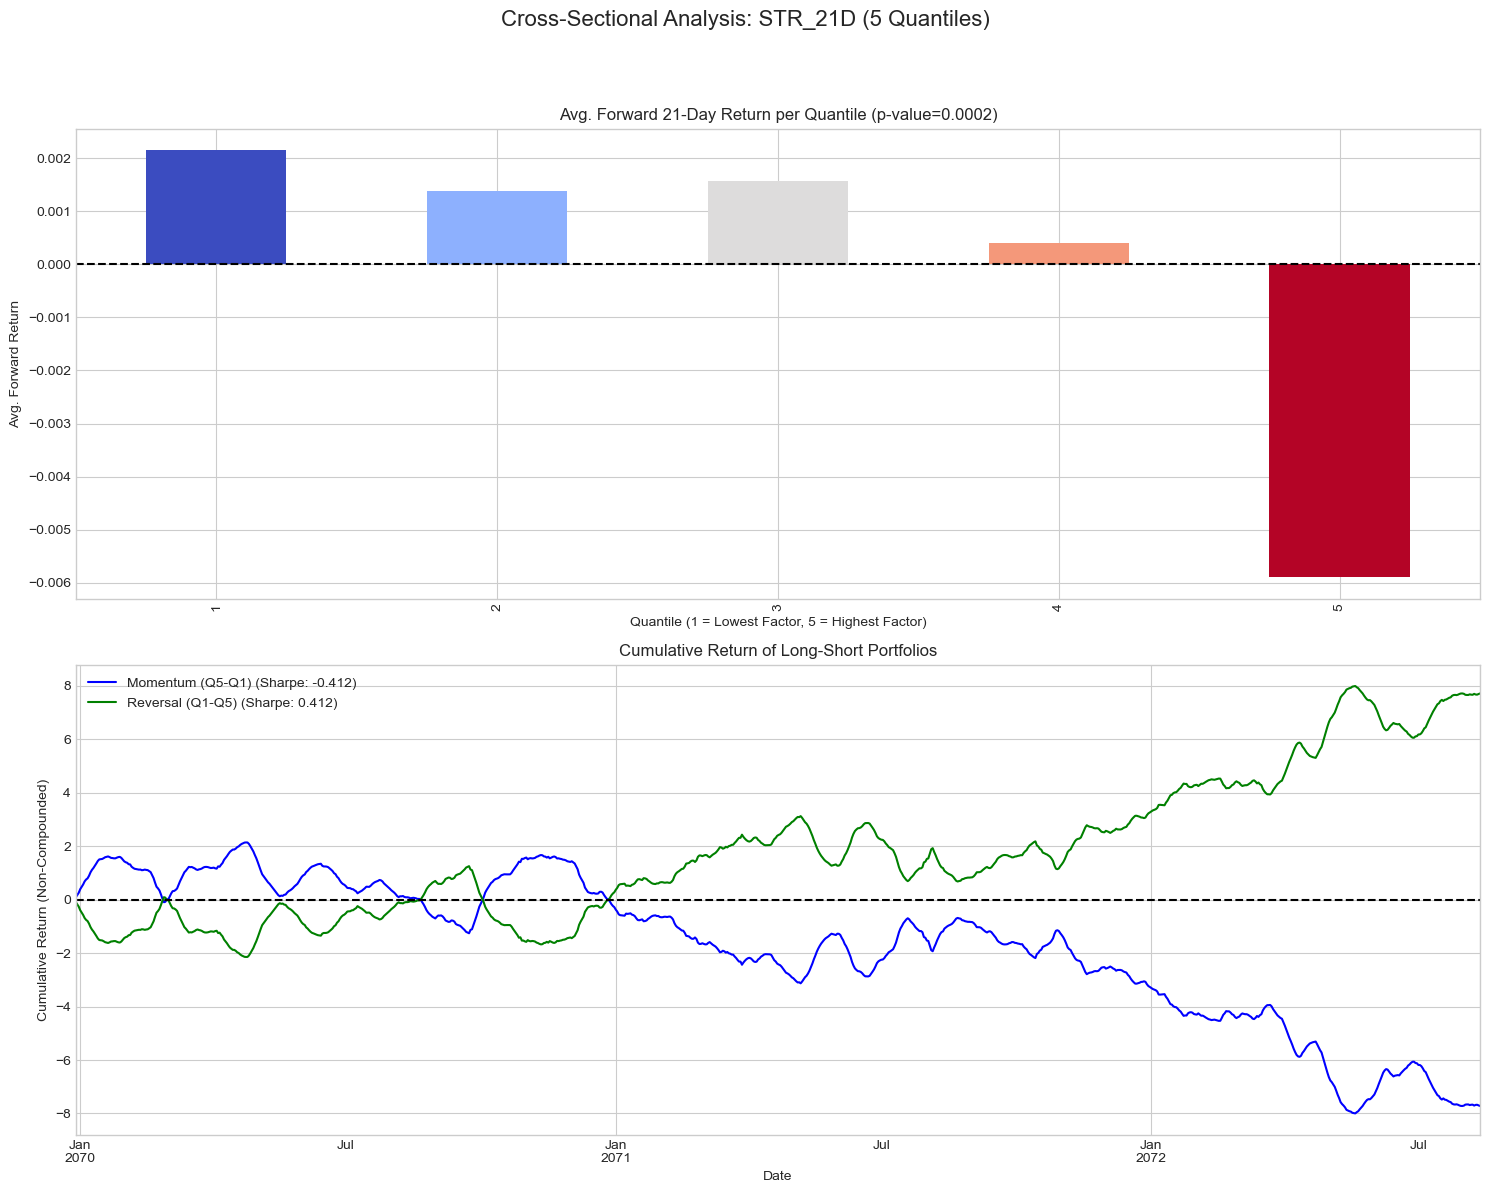


--- 正在运行分位数分析: MOM_126D ---

MOM_126D - 每个分位数的平均 21日 收益:
Quantile
1    0.00400
2    0.00050
3   -0.00196
4    0.00122
5   -0.00205

--- 核心论据 (统计显著性) ---
T-检验 (Q5 vs Q1): T-stat=-2.621, P-value=0.00881
多空组合 (Momentum, Q5-Q1) 年化夏普比率: -0.3222
多空组合 (Reversal, Q1-Q5) 年化夏普比率: 0.3222


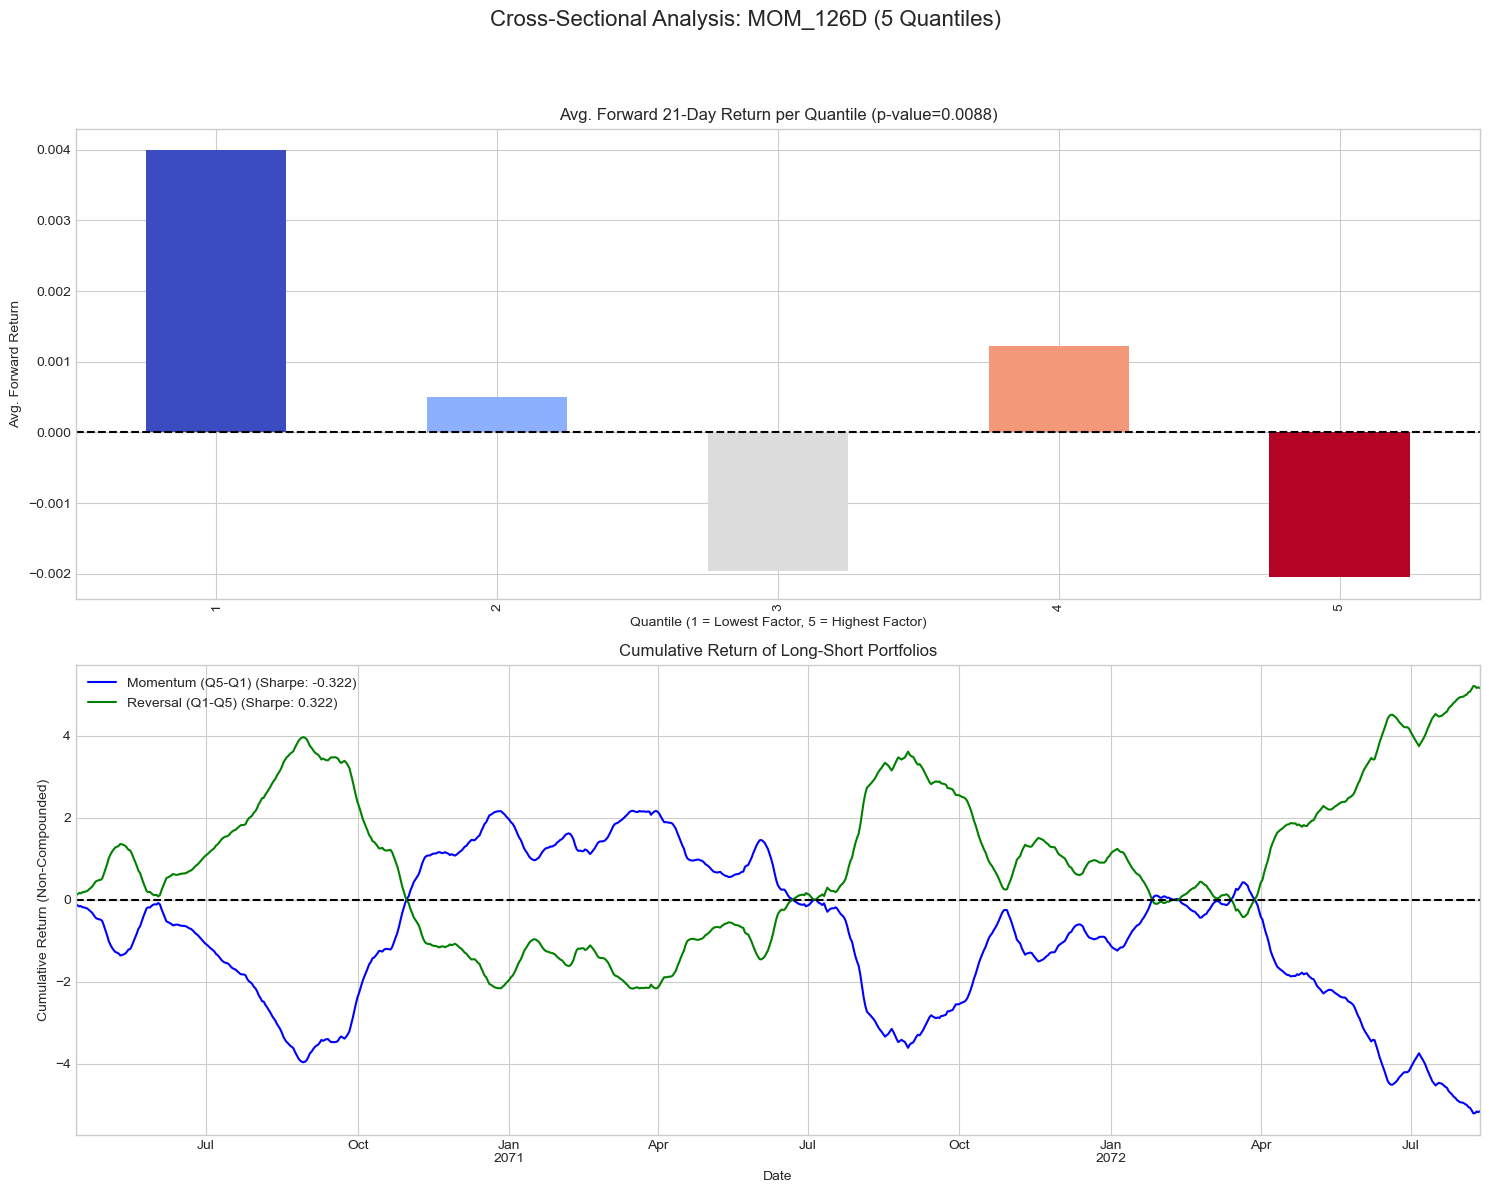


--- ✅ “军火库”横截面分析已执行完毕 ---


In [5]:
# 单元格 5 (最终版)：🚀 “军火库”横截面分析 🚀

# (确保 单元格 3 已运行)
if 'merged_prices' not in locals():
    print("❌ 错误: 'merged_prices' 未定义。请先运行 单元格 3。")
else:
    print("✅ 先决条件检查通过。")

    # --- 1. 相关性热力图 (来自 plot_correlation_heatmap.py) ---
    print("\n--- [1/3] 分析: 横截面相关性 (Heatmap) ---")
    try:
        # (这是“好”API 之一，我们调用它)
        plot_correlation_heatmap.plot_correlation_heatmap(
            log_returns_df=log_returns #
        )
    except Exception as e:
        print(f"❌ 相关性热力图 失败: {e}")

    # --- 2. 收益率直方图 (来自 plot_return_histograms.py) ---
    print("\n--- [2/3] 分析: 收益率分布 (Histograms) ---")
    print("(注意: 这将为 *每个* 资产生成一个图表)")
    try:
        for asset in log_returns.columns:
            print(f"  ... 正在绘制 {asset} 的直方图")
            # (这是“好”API 之一，我们调用它)
            plot_return_histograms.plot_histogram(
                log_returns_series=log_returns[asset].dropna(), 
                asset_name=asset,
                bins="fd" #
            )
    except Exception as e:
        print(f"❌ 直方图 失败: {e}")
        
    # --- 3. 分位数分析 (来自 plot_quantile_analysis.py) ---
    print("\n--- [3/3] 分析: 横截面分位数 (Quantile) ---")
    try:
        # 我们将调用我们修复后的 API 两次
        
        # A. 因子: 短期反转 (STR)
        plot_quantile_analysis.plot_quantile_analysis_v2(
            merged_prices_df=merged_prices, 
            factor_lookback_days=21, 
            forward_return_days=21,  
            factor_name="STR_21D"    
        )
        
        # B. 因子: 动量 (Momentum)
        plot_quantile_analysis.plot_quantile_analysis_v2(
            merged_prices_df=merged_prices, 
            factor_lookback_days=126, 
            forward_return_days=21,   
            factor_name="MOM_126D"    
        )
    except Exception as e:
        print(f"❌ 分位数分析 失败: {e}")

    print(f"\n--- ✅ “军火库”横截面分析已执行完毕 ---")